# 01 Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Dataframe

In [4]:
# Importing products dataframe
path = r'C:\Users\vacgo\Documents\Achievement 4\Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_latest_20241113.pkl'))

# 03 Plotting

<Axes: xlabel='order_day_of_week'>

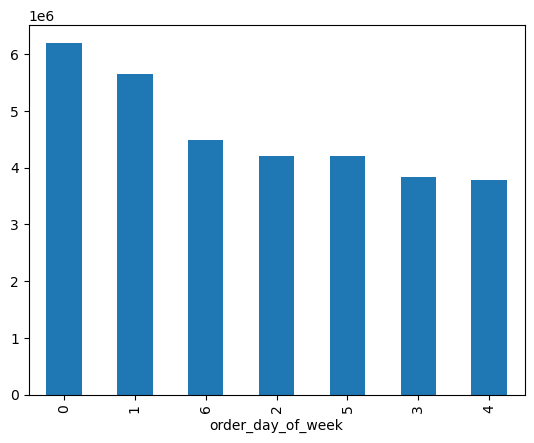

In [6]:
# Creating plot for order_day_of_week
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

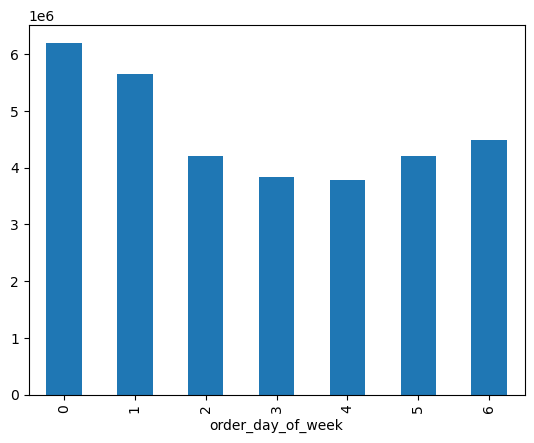

In [7]:
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# With colour
#bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# Exporting the visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

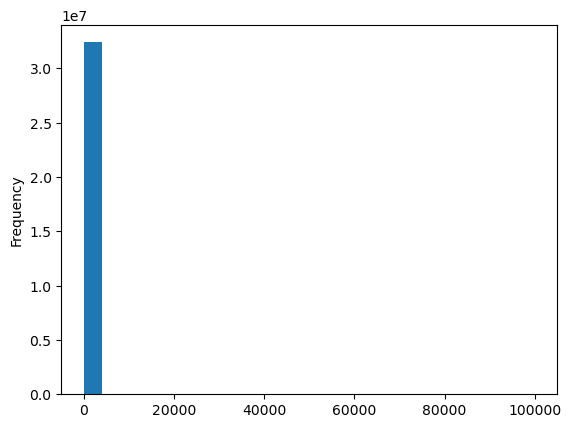

In [10]:
# Histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.980225638383445

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

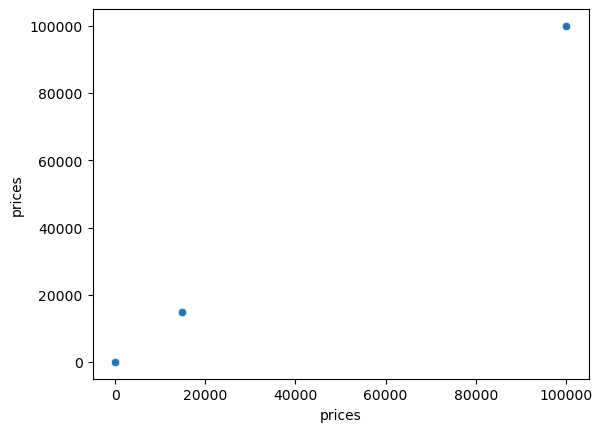

In [15]:
# Checking Scatterplot
sns.scatterplot(x = 'prices', y='prices', data =ords_prods_merge)

In [16]:
# Looking at products with more than 100 in price
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_last_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,ave_spent,spender,median_days_to_order,frequent_cust
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,False,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,False,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,False,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,False,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,...,High-range product,Regularly busy,Busiest days,Average orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,...,High-range product,Least busy,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [17]:
# Assigning NaN values to prices with more than 100

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

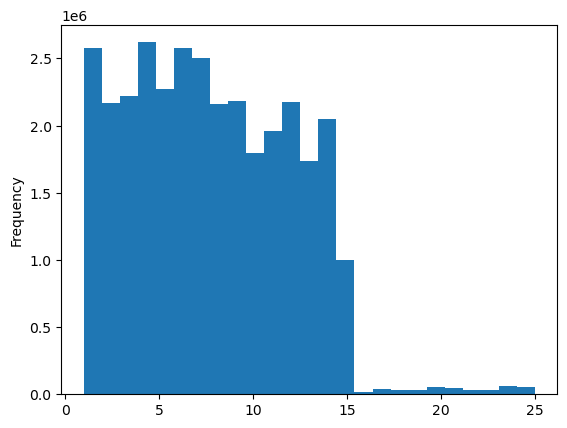

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

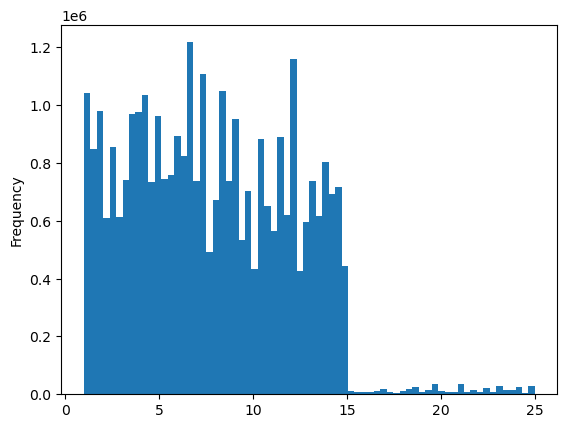

In [20]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [21]:
# Exporting the visualization
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70bin.png'))

In [22]:
# Splitting dataframes into two
# Creating a random number
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# assigning the rows into big and small (tilde negates)
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [24]:
# Check if the dataframe and subsets have the same len

len(ords_prods_merge)

32404859

In [25]:
len(big) + len(small)

32404859

In [26]:
df_2 = small[['order_day_of_week', 'prices']]

In [27]:
#line = sns.lineplot(data = df_2, x='order_day_of_week', y = 'prices')

In [28]:
# Exporting linechart
#line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_order_day_vs_price_small.png'))